In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import scipy as sp

In [13]:
df = pd.read_csv('ks-projects-201801.csv')
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [14]:
df.isnull().sum()

ID                     0
name                   4
category               0
main_category          0
currency               0
deadline               0
goal                   0
launched               0
pledged                0
state                  0
backers                0
country                0
usd pledged         3797
usd_pledged_real       0
usd_goal_real          0
dtype: int64

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 15 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   ID                378661 non-null  int64  
 1   name              378657 non-null  object 
 2   category          378661 non-null  object 
 3   main_category     378661 non-null  object 
 4   currency          378661 non-null  object 
 5   deadline          378661 non-null  object 
 6   goal              378661 non-null  float64
 7   launched          378661 non-null  object 
 8   pledged           378661 non-null  float64
 9   state             378661 non-null  object 
 10  backers           378661 non-null  int64  
 11  country           378661 non-null  object 
 12  usd pledged       374864 non-null  float64
 13  usd_pledged_real  378661 non-null  float64
 14  usd_goal_real     378661 non-null  float64
dtypes: float64(5), int64(2), object(8)
memory usage: 43.3+ MB


In [16]:
print(f"the number of rows are {df.shape[0]} and columns are {df.shape[1]}")

the number of rows are 378661 and columns are 15


In [17]:
df.columns

Index(['ID', 'name', 'category', 'main_category', 'currency', 'deadline',
       'goal', 'launched', 'pledged', 'state', 'backers', 'country',
       'usd pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [18]:
df['usd pledged'].value_counts()

usd pledged
0.00         68112
1.00          5341
25.00         3877
10.00         3624
50.00         3141
             ...  
9093.52          1
5.99             1
211.01           1
200032.09        1
2698.97          1
Name: count, Length: 95455, dtype: int64

In [19]:
df[df['usd pledged'].isnull()].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
169,1000694855,STREETFIGHTERZ WHEELIE MURICA,Film & Video,Film & Video,USD,2014-09-20,6500.0,2014-08-06 21:28:36,555.00,undefined,0,"N,0""",NaN,555.00,6500.00
328,100149523,Duncan Woods - Chameleon EP,Music,Music,AUD,2015-08-25,4500.0,2015-08-04 12:05:17,4767.00,undefined,0,"N,0""",NaN,3402.08,3211.53
632,1003023003,The Making of Ashley Kelley's Debut Album,Music,Music,USD,2015-04-09,3500.0,2015-03-10 20:06:13,3576.00,undefined,0,"N,0""",NaN,3576.00,3500.00
647,1003130892,Butter Side Down Debut Album,Music,Music,USD,2015-11-26,6000.0,2015-11-02 22:09:19,7007.80,undefined,0,"N,0""",NaN,7007.80,6000.00
749,1003629045,Chase Goehring debut EP,Music,Music,USD,2016-03-21,3000.0,2016-02-23 03:09:49,3660.38,undefined,0,"N,0""",NaN,3660.38,3000.00


In [20]:
df['usd pledged'] = df['usd pledged'].fillna(df['usd pledged'].mean())

In [21]:
df['usd pledged'].isnull().sum()

0

In [22]:
df[df['name'].isnull()].head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real
166851,1848699072,NaN,Narrative Film,Film & Video,USD,2012-02-29,200000.0,2012-01-01 12:35:31,100.0,failed,1,US,100.00,100.00,200000.00
307234,634871725,NaN,Video Games,Games,GBP,2013-01-06,2000.0,2012-12-19 23:57:48,196.0,failed,12,GB,317.73,316.05,3224.97
309991,648853978,NaN,Product Design,Design,USD,2016-07-18,2500.0,2016-06-18 05:01:47,0.0,suspended,0,US,0.00,0.00,2500.00
338931,796533179,NaN,Painting,Art,USD,2011-12-05,35000.0,2011-11-06 23:55:55,220.0,failed,5,US,220.00,220.00,35000.00


In [23]:
df['name'] = df['name'].fillna('No Name')

In [24]:
df['name'].isnull().sum()

0

In [25]:
df.isnull().sum()

ID                  0
name                0
category            0
main_category       0
currency            0
deadline            0
goal                0
launched            0
pledged             0
state               0
backers             0
country             0
usd pledged         0
usd_pledged_real    0
usd_goal_real       0
dtype: int64

In [26]:
df.duplicated().sum()

0

In [27]:
df['usd pledged'].describe()

count    3.786610e+05
mean     7.036729e+03
std      7.824447e+04
min      0.000000e+00
25%      1.900000e+01
50%      4.118700e+02
75%      3.175000e+03
max      2.033899e+07
Name: usd pledged, dtype: float64

C:\Users\Sanskruti Pawar\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


<Figure size 2000x600 with 0 Axes>

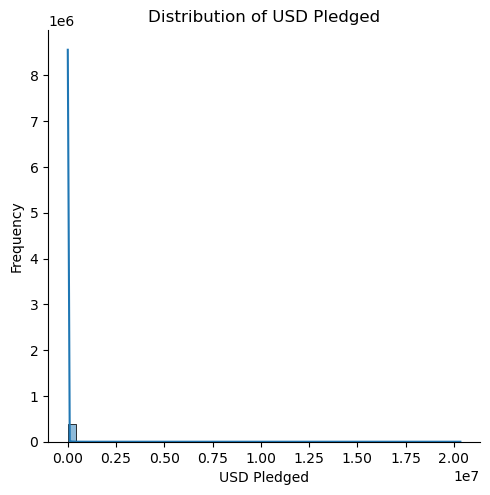

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(20,6))
sns.displot(df['usd pledged'], bins=50, kde=True)
plt.title('Distribution of USD Pledged')
plt.xlabel('USD Pledged')
plt.ylabel('Frequency')
plt.show()

### Task

Convert the 'deadline' and 'launched' columns in the DataFrame to datetime objects, and then verify that the conversion was successful by checking their data types.

In [29]:
df['deadline'] = pd.to_datetime(df['deadline'])
df['deadline'].head()

0   2015-10-09
1   2017-11-01
2   2013-02-26
3   2012-04-16
4   2015-08-29
Name: deadline, dtype: datetime64[ns]

### Convert 'launched' to datetime

Convert the 'launched' column to datetime objects using pd.to_datetime() to enable time-based operations and analysis.

In [30]:
df['launched'] = pd.to_datetime(df['launched'])
df['launched'].head()

0   2015-08-11 12:12:28
1   2017-09-02 04:43:57
2   2013-01-12 00:20:50
3   2012-03-17 03:24:11
4   2015-07-04 08:35:03
Name: launched, dtype: datetime64[ns]

In [31]:
df[['deadline', 'launched']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 378661 entries, 0 to 378660
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype         
---  ------    --------------   -----         
 0   deadline  378661 non-null  datetime64[ns]
 1   launched  378661 non-null  datetime64[ns]
dtypes: datetime64[ns](2)
memory usage: 5.8 MB


In [32]:
df['duration'] = df['deadline'] - df['launched']
df['duration'].head()

0   58 days 11:47:32
1   59 days 19:16:03
2   44 days 23:39:10
3   29 days 20:35:49
4   55 days 15:24:57
Name: duration, dtype: timedelta64[ns]

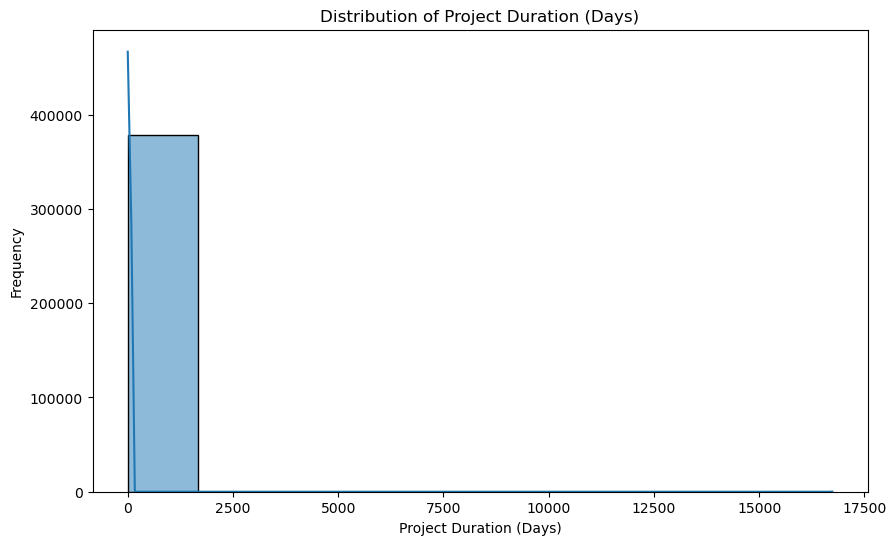

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

df['duration_days'] = df['duration'].dt.days

plt.figure(figsize=(10, 6))
sns.histplot(df['duration_days'], bins=10, kde=True)
plt.title('Distribution of Project Duration (Days)')
plt.xlabel('Project Duration (Days)')
plt.ylabel('Frequency')
plt.show()


In [34]:
df.head()

,ID,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd pledged,usd_pledged_real,usd_goal_real,duration,duration_days
0,1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:28,0.0,failed,0,GB,0.0,0.0,1533.95,58 days 11:47:32,58
1,1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:57,2421.0,failed,15,US,100.0,2421.0,30000.00,59 days 19:16:03,59
2,1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:50,220.0,failed,3,US,220.0,220.0,45000.00,44 days 23:39:10,44
3,1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:11,1.0,failed,1,US,1.0,1.0,5000.00,29 days 20:35:49,29
4,1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:03,1283.0,canceled,14,US,1283.0,1283.0,19500.00,55 days 15:24:57,55


### Task

Check Unique Values for Categorical Columns

In [35]:
categorical_cols = ['category', 'main_category', 'currency', 'state', 'country']

for col in categorical_cols:
    print(f"Number of unique values in '{col}': {df[col].nunique()}")

Number of unique values in 'category': 159
Number of unique values in 'main_category': 15
Number of unique values in 'currency': 14
Number of unique values in 'state': 6
Number of unique values in 'country': 23


### Visualize Distribution of Main Categories

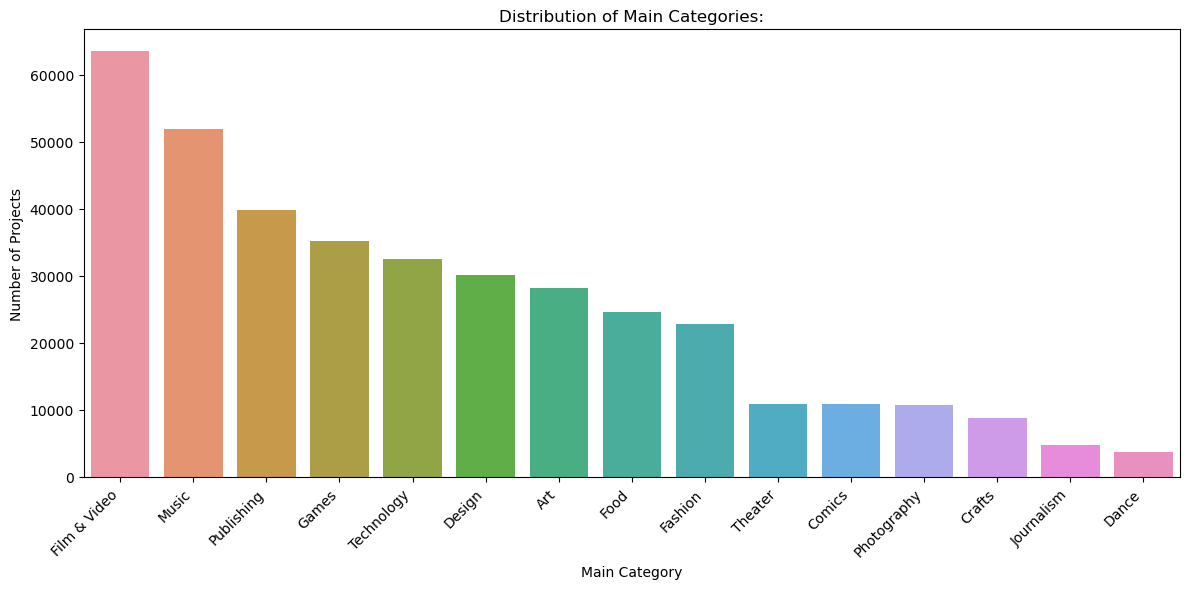

In [36]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='main_category', order=df['main_category'].value_counts().index)
plt.title('Distribution of Main Categories:')
plt.xlabel('Main Category')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

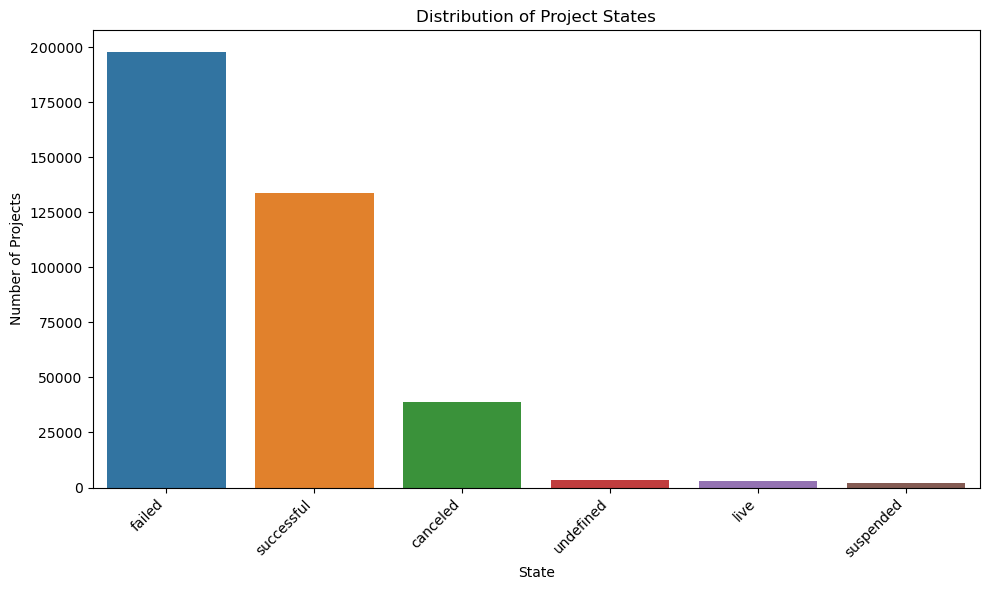

In [37]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='state', order=df['state'].value_counts().index)
plt.title('Distribution of Project States')
plt.xlabel('State')
plt.ylabel('Number of Projects')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [38]:
df.describe()

,ID,deadline,goal,launched,pledged,backers,usd pledged,usd_pledged_real,usd_goal_real,duration,duration_days
count,3.786610e+05,378661,3.786610e+05,378661,3.786610e+05,378661.000000,3.786610e+05,3.786610e+05,3.786610e+05,378661,378661.000000
mean,1.074731e+09,2014-11-01 16:04:27.950488832,4.908079e+04,2014-09-28 18:06:17.416520448,9.682979e+03,105.617476,7.036729e+03,9.058924e+03,4.545440e+04,33 days 21:58:10.533968378,33.481122
min,5.971000e+03,2009-05-03 00:00:00,1.000000e-02,1970-01-01 01:00:00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,1.000000e-02,0 days 00:07:17,0.000000
25%,5.382635e+08,2013-06-08 00:00:00,2.000000e+03,2013-05-07 22:14:27,3.000000e+01,2.000000,1.900000e+01,3.100000e+01,2.000000e+03,29 days 02:20:36,29.000000
50%,1.075276e+09,2015-01-14 00:00:00,5.200000e+03,2014-12-10 03:23:41,6.200000e+02,12.000000,4.118700e+02,6.243300e+02,5.500000e+03,29 days 16:32:32,29.000000
75%,1.610149e+09,2016-04-28 00:00:00,1.600000e+04,2016-03-24 10:21:09,4.076000e+03,56.000000,3.175000e+03,4.050000e+03,1.550000e+04,36 days 15:35:44,36.000000
max,2.147476e+09,2018-03-03 00:00:00,1.000000e+08,2018-01-02 15:02:31,2.033899e+07,219382.000000,2.033899e+07,2.033899e+07,1.663614e+08,16738 days 23:00:00,16738.000000
std,6.190862e+08,NaN,1.183391e+06,NaN,9.563601e+04,907.185035,7.824447e+04,9.097334e+04,1.152950e+06,65 days 21:55:09.506515067,65.909172


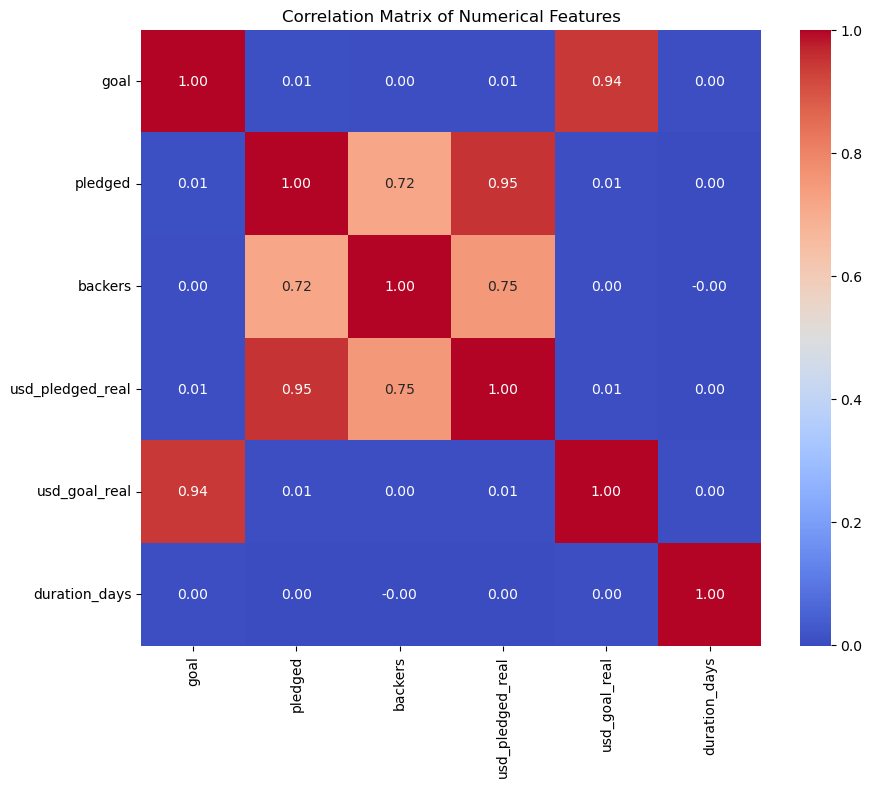

In [40]:
numerical_features = ['goal', 'pledged', 'backers', 'usd_pledged_real', 'usd_goal_real', 'duration_days']
correlation_matrix = df[numerical_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()

### observation

1. The big relation is pledged and usd_pledged_real 0.95

2. The small relation  is pledged vs. usd_goal_real 0.94

In [45]:
df['usd pledged'].corr(df['usd_pledged_real'])

0.9066144973562291

### Observation

#### The most category value is 3D printing

In [54]:
df.groupby('category')['usd pledged'].mean()

category
3D Printing    52037.460891
Academic        1407.115666
Accessories     4390.817724
Action          2957.936216
Animals         2345.198863
                   ...     
Woodworking     1183.717198
Workshops       1042.543720
World Music     3089.061399
Young Adult     1008.785457
Zines           1563.065422
Name: usd pledged, Length: 159, dtype: float64

### observation

#### The small category value is Zines

In [51]:
df['usd_diff'] = df['usd_pledged_real'] -df['usd pledged']

In [52]:
df['usd_diff'].describe()

count    3.786610e+05
mean     2.022195e+03
std      3.861982e+04
min     -1.196293e+05
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      7.164658e+06
Name: usd_diff, dtype: float64

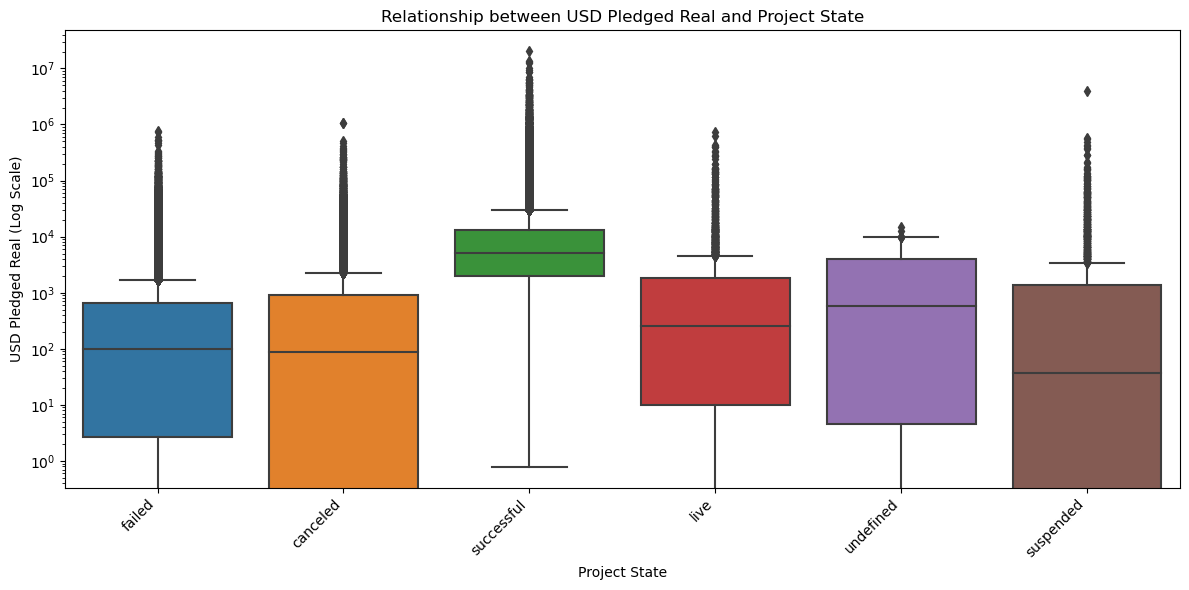

In [55]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='state', y='usd_pledged_real')
plt.title('Relationship between USD Pledged Real and Project State')
plt.xlabel('Project State')
plt.ylabel('USD Pledged Real (Log Scale)')
plt.yscale('log') 
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

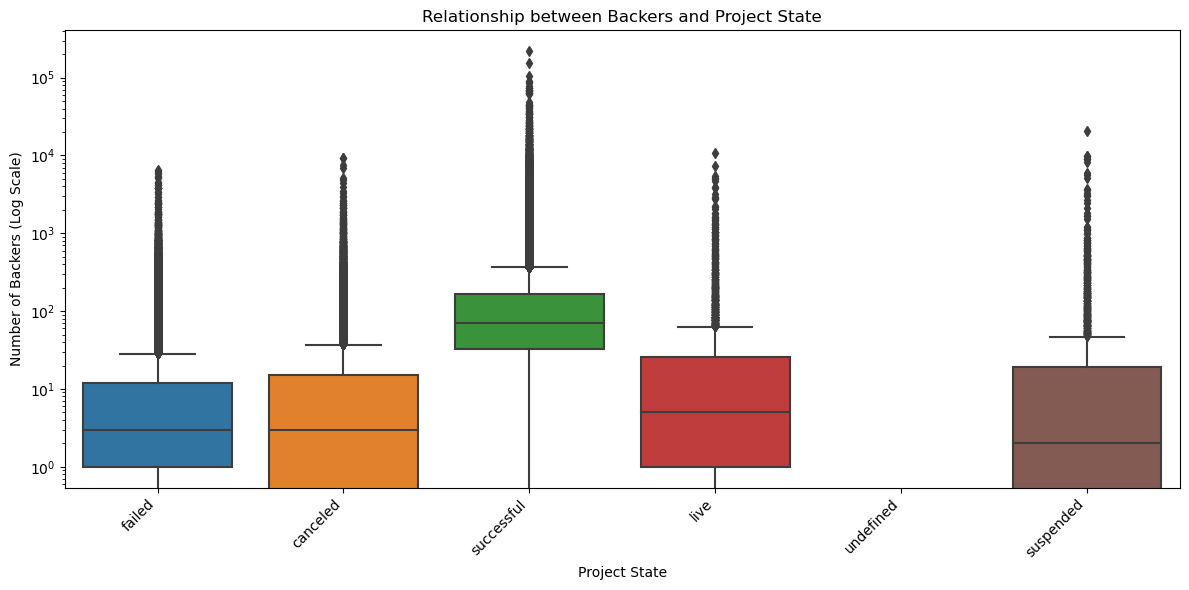

In [56]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='state', y='backers')
plt.title('Relationship between Backers and Project State')
plt.xlabel('Project State')
plt.ylabel('Number of Backers (Log Scale)')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
S